In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import librosa
import librosa.display as disp
from librosa import display

from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import binom_test
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import binom_test, proportions_ztest, proportions_chisquare
from statsmodels.distributions.empirical_distribution import ECDF

Отберём страны с не менее 30 представителями.

In [3]:
dirpath = r'C:\Users\troma\Documents\8 семестр\Прикладная статистика\recordings'
nations = set()
for (dirpath, dirnames, filenames) in os.walk(dirpath):
    for file in filenames:
        if '30' in file:
            #print(file)
            nation = re.sub(r"\d+", "", os.path.splitext(file)[0], flags=re.UNICODE)
            #print(nation)
            nations.add(nation)
print(nations)

{'italian', 'polish', 'portuguese', 'turkish', 'german', 'dutch', 'french', 'korean', 'mandarin', 'arabic', 'spanish', 'english', 'russian'}


А теперь преобразуем аудиофайлы выбранных стран в формат wav, посчитаем zero-crossing и сразу будем формировать датасет.

In [4]:
data = pd.DataFrame(columns=['nation', 'zero-crossing'])
for (dirpath, dirnames, filenames) in os.walk(dirpath):
    for file in filenames:
        for nation in nations:
            if nation in file:
                name = os.path.splitext(file)[0]
                !sox "{dirpath}\{name}.mp3" "{dirpath}\{name}.wav"
                x, sr = librosa.load(f"{dirpath}\\{name}.wav")
                zero_crossings = librosa.zero_crossings(x, pad=False)
                row = {'nation': nation, 'zero-crossing': sum(zero_crossings)}
                data = data.append(row, ignore_index = True)

sox WARN sox: `C:\Users\troma\Documents\8 семестр\Прикладная статистика\recordings\english154.wav' output clipped 1 samples; decrease volume?
sox WARN sox: `C:\Users\troma\Documents\8 семестр\Прикладная статистика\recordings\english265.wav' output clipped 2 samples; decrease volume?
sox WARN sox: `C:\Users\troma\Documents\8 семестр\Прикладная статистика\recordings\english360.wav' output clipped 2 samples; decrease volume?
sox WARN sox: `C:\Users\troma\Documents\8 семестр\Прикладная статистика\recordings\portuguese20.wav' output clipped 1 samples; decrease volume?


In [9]:
#data.to_csv('data5-2.csv')

In [11]:
#data = pd.read_csv('data5-2.csv')
#data = data.drop(columns=['Unnamed: 0'])
#data

,nation,zero-crossing
0,arabic,99516
1,arabic,90424
2,arabic,116407
3,arabic,104068
4,arabic,58548
...,...,...
1301,turkish,64459
1302,turkish,42306
1303,turkish,82919
1304,turkish,93297


In [26]:
data.describe(include='all')

,nation,zero-crossing
count,1306,1306.000000
unique,13,NaN
top,english,NaN
freq,579,NaN
mean,NaN,78126.283308
std,NaN,30739.713459
min,NaN,9712.000000
25%,NaN,57551.250000
50%,NaN,72877.500000
75%,NaN,93231.000000


In [7]:
dic = dict()
for nation in nations:
    dic[nation] = []
dic

{'italian': [],
 'polish': [],
 'portuguese': [],
 'turkish': [],
 'german': [],
 'dutch': [],
 'french': [],
 'korean': [],
 'mandarin': [],
 'arabic': [],
 'spanish': [],
 'english': [],
 'russian': []}

In [15]:
for i in range(len(data)):
    dic[data.loc[i]['nation']].append(data.loc[i]['zero-crossing'])
dic

{'italian': [70366,
  46216,
  50980,
  45866,
  42838,
  79961,
  48208,
  56287,
  45730,
  86674,
  77554,
  96424,
  59888,
  67490,
  117105,
  70322,
  77553,
  42394,
  68372,
  89084,
  60561,
  75260,
  42211,
  137870,
  67293,
  125142,
  151874,
  50488,
  45956,
  13588,
  52633,
  70874,
  56415],
 'polish': [57604,
  97344,
  44269,
  70680,
  64798,
  92859,
  66564,
  59650,
  123295,
  54988,
  41656,
  114437,
  116972,
  73199,
  125992,
  50190,
  85848,
  70694,
  95208,
  106190,
  60050,
  109224,
  72386,
  149518,
  107511,
  64728,
  51779,
  133208,
  71730,
  47961,
  62299,
  35696,
  62600,
  67392],
 'portuguese': [104302,
  89552,
  82706,
  58789,
  55695,
  62349,
  68489,
  77872,
  69347,
  60987,
  19025,
  53056,
  84377,
  34323,
  76698,
  58917,
  97387,
  71746,
  52144,
  70300,
  79865,
  80204,
  69152,
  40164,
  93126,
  56294,
  50492,
  28512,
  50563,
  171217,
  51301,
  59798,
  90595,
  75716,
  83582,
  63719,
  68953,
  55809,
  4

In [25]:
zero_cros = []
for nation in dic.keys():
    zero_cros.append(dic[nation])
zero_cros

[[70366,
  46216,
  50980,
  45866,
  42838,
  79961,
  48208,
  56287,
  45730,
  86674,
  77554,
  96424,
  59888,
  67490,
  117105,
  70322,
  77553,
  42394,
  68372,
  89084,
  60561,
  75260,
  42211,
  137870,
  67293,
  125142,
  151874,
  50488,
  45956,
  13588,
  52633,
  70874,
  56415],
 [57604,
  97344,
  44269,
  70680,
  64798,
  92859,
  66564,
  59650,
  123295,
  54988,
  41656,
  114437,
  116972,
  73199,
  125992,
  50190,
  85848,
  70694,
  95208,
  106190,
  60050,
  109224,
  72386,
  149518,
  107511,
  64728,
  51779,
  133208,
  71730,
  47961,
  62299,
  35696,
  62600,
  67392],
 [104302,
  89552,
  82706,
  58789,
  55695,
  62349,
  68489,
  77872,
  69347,
  60987,
  19025,
  53056,
  84377,
  34323,
  76698,
  58917,
  97387,
  71746,
  52144,
  70300,
  79865,
  80204,
  69152,
  40164,
  93126,
  56294,
  50492,
  28512,
  50563,
  171217,
  51301,
  59798,
  90595,
  75716,
  83582,
  63719,
  68953,
  55809,
  45818,
  83317,
  36931,
  105074,
 

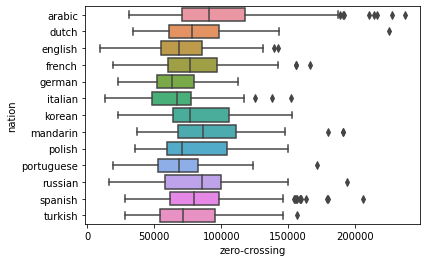

In [19]:
_ = sns.boxplot(x='zero-crossing', y='nation', data=data)
plt.show()

Альтернативная гипотеза не предполагает, что средние каким-то образом упорядочены, поэтому используем критерий Краскела-Уоллиса

In [18]:
st.kruskal(*zero_cros)

KruskalResult(statistic=93.61780697006445, pvalue=9.806025700767766e-15)

p-value очень маленькое, намного меньше 0.5, значит, мы отклоняем гипотезу о том, что национальность не влияет на zero-crossing